ChatGPT was used

# Environment Setup

In [ ]:
# import NLP related packages
import spacy
import spacy.cli

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

# Importing data analysis and visualization libraries.
import pandas as pd  # Pandas for data manipulation and analysis.
import numpy as np   # NumPy for numerical operations.
import seaborn as sns  # Seaborn for statistical data visualization.
import matplotlib.pyplot as plt  # Matplotlib's pyplot for creating static, interactive, and animated visualizations.

# Importing statistical analysis packages.
import statsmodels.api as sm  # Statsmodels for estimating and interpreting models for statistical analysis.
from statsmodels.formula.api import ols  # Importing 'ols' for ordinary least squares regression.
import scipy.stats as stats  # SciPy's stats module for a large number of probability distributions and statistical functions.
from scipy.stats import spearmanr  # for calculating the Spearman rank-order correlation coefficient

# Importing the 'os' library for operating system dependent functionality.
import os



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Load and clean data

In [ ]:
# Load the Drive helper
# This helps me access and manipulate files stored in my Drive.
from google.colab import drive
drive.mount('/content/drive')

#change directory
os.chdir("/content/drive/My Drive/vandy 24spring/DS 5780/Presentation/final")

Mounted at /content/drive


# Demographic information

In [ ]:
# Analyze demographic data for the participants
demographic= pd.read_excel('demographic.xlsx')
demographic_CHN = demographic[demographic['Country']=='CHN']
demographic_CHN

,Code,Country,PTJ1 (wds),PTJ2 (wds),SMK1 (wds),SMK2 (wds),Self Ev,Sex,Age,Grade/Degree,...,Inschool,Outschool,Listening,Reading,Speaking,Writing,NS,Pronunciation,Presentation,EssayW
0,WE_CHN_001,CHN,271,NaN,219,NaN,NaN,F,20,2.0,...,3.89,3.56,4.00,4.50,3.50,3.75,4,5,5,4
1,WE_CHN_002,CHN,203,NaN,292,NaN,NaN,F,21,3.0,...,3.00,2.88,3.00,3.00,2.75,3.33,3,3,3,3
2,WE_CHN_003,CHN,238,NaN,250,NaN,NaN,F,20,3.0,...,4.22,4.11,5.00,4.00,3.75,4.25,4,5,5,5
3,WE_CHN_004,CHN,269,NaN,230,NaN,NaN,F,20,2.0,...,3.44,3.00,3.75,3.75,3.25,3.25,3,5,5,5
4,WE_CHN_005,CHN,225,NaN,208,NaN,NaN,M,20,2.0,...,4.33,3.67,5.00,5.00,3.25,3.75,3,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,WE_CHN_396,CHN,262,NaN,221,NaN,NaN,M,19,1.0,...,3.22,2.44,3.00,3.25,2.75,2.75,2,2,5,4
396,WE_CHN_397,CHN,316,NaN,325,NaN,NaN,M,19,1.0,...,3.67,3.22,3.50,3.50,3.00,3.75,1,4,2,4
397,WE_CHN_398,CHN,231,NaN,219,NaN,NaN,F,18,1.0,...,3.89,3.89,4.75,4.00,3.50,3.75,5,5,5,5
398,WE_CHN_399,CHN,210,NaN,225,NaN,NaN,M,21,1.0,...,4.89,4.78,5.00,5.00,5.00,5.00,6,5,5,6


In [ ]:
demographic_CHN.describe()

,PTJ1 (wds),PTJ2 (wds),SMK1 (wds),SMK2 (wds),Self Ev,Age,Grade/Degree,Yrs of Stay (< Yrs),VST,INTM,...,INTM-INSM,Primary,Secondary,College,Inschool,Outschool,Listening,Reading,Speaking,Writing
count,400.000000,0.0,400.000000,0.0,0.0,400.000000,400.000000,0.0,400.000000,399.000000,...,399.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,244.392500,NaN,229.347500,NaN,NaN,19.255000,1.522500,NaN,32.027500,4.651178,...,-0.130100,2.730000,3.667150,4.02155,3.964900,3.472475,4.195625,4.026875,3.458750,3.688325
std,35.337378,NaN,29.990504,NaN,NaN,1.006234,0.587671,NaN,6.918918,0.834010,...,0.871637,1.179227,0.824813,0.86728,0.714485,0.848245,0.706672,0.830796,0.836315,0.886006
min,180.000000,NaN,175.000000,NaN,NaN,17.000000,1.000000,NaN,15.000000,0.000000,...,-2.670000,1.000000,1.000000,1.63000,1.000000,1.440000,2.000000,1.000000,1.000000,1.000000
25%,217.000000,NaN,208.000000,NaN,NaN,19.000000,1.000000,NaN,27.000000,4.170000,...,-0.670000,2.000000,3.130000,3.50000,3.440000,2.890000,3.750000,3.500000,2.750000,3.250000
50%,233.000000,NaN,221.000000,NaN,NaN,19.000000,1.000000,NaN,32.000000,4.670000,...,-0.160000,2.500000,3.630000,4.00000,4.000000,3.440000,4.250000,4.000000,3.500000,3.750000
75%,265.250000,NaN,243.250000,NaN,NaN,20.000000,2.000000,NaN,37.000000,5.250000,...,0.330000,3.500000,4.250000,4.63000,4.440000,4.000000,4.750000,4.750000,4.000000,4.250000
max,342.000000,NaN,331.000000,NaN,NaN,23.000000,4.000000,NaN,48.000000,6.000000,...,3.170000,6.000000,6.000000,6.00000,5.890000,5.780000,6.000000,6.000000,6.000000,6.000000


In [ ]:
print(demographic_CHN['Sex'].value_counts())
print(demographic_CHN['Grade/Degree'].value_counts())
print(demographic_CHN['Acad. Genre'].value_counts())

Sex
F     210
M     189
M       1
Name: count, dtype: int64
Grade/Degree
1.0    207
2.0    180
3.0     10
4.0      3
Name: count, dtype: int64
Acad. Genre
Sciences & Technology    195
Social Sciences          104
Humanities                86
Life Sciences              5
Name: count, dtype: int64


In [ ]:
# load data for research questions
# List of tuples, each containing file info
files_and_proficiencies = [
    ('WE_CHN_SMK_A2_0.txt', 'A2_0', 'SMK'),
    ('WE_CHN_SMK_B1_1.txt', 'B1_1', 'SMK'),
    ('WE_CHN_SMK_B1_2.txt', 'B1_2', 'SMK'),
    ('WE_CHN_SMK_B2_0.txt', 'B2_0', 'SMK'),
    ('WE_CHN_PTJ_A2_0.txt', 'A2_0', 'PTJ'),
    ('WE_CHN_PTJ_B1_1.txt', 'B1_1', 'PTJ'),
    ('WE_CHN_PTJ_B1_2.txt', 'B1_2', 'PTJ'),
    ('WE_CHN_PTJ_B2_0.txt', 'B2_0', 'PTJ')
]

# Initialize a new DataFrame with specified column names to store the processed data
df_uncleaned = pd.DataFrame(columns=['Type', 'Proficiency', 'Writing_Sample', 'Background'])

# Define the function to process files
def process_file(file_path, proficiency, file_type):
    # Extract the background based on the file name
    background = file_path.split('_')[1] if "CHN" in file_path else "JPN"
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the file content and split it into paragraphs based on double newline characters
        paragraphs = file.read().split('\n\n')
        # Remove leading and trailing whitespace and filter out empty paragraphs
        paragraphs = [p.strip() for p in paragraphs if p.strip() != '']
    return [{'Type': file_type, 'Proficiency': proficiency, 'Writing_Sample': p, 'Background': background} for p in paragraphs]

# Iterate over each file specified in the files_and_proficiencies list
for file_path, proficiency, file_type in files_and_proficiencies:
    # Check if the file exists before processing
    if os.path.exists(file_path):
        file_data = process_file(file_path, proficiency, file_type)
        # Concatenate the returned list of dictionaries to the DataFrame
        df_uncleaned = pd.concat([df_uncleaned, pd.DataFrame(file_data)], ignore_index=True)
    else:
        print(f"File not found: {file_path}")

# Display the DataFrame
print(df_uncleaned)

    Type Proficiency                                     Writing_Sample  \
0    SMK        A2_0  ﻿Some people hold that smoking should be compl...   
1    SMK        A2_0  For many years, smoking is a hot topic for the...   
2    SMK        A2_0  Nowadays, it is generally accepted that smokin...   
3    SMK        A2_0  I disagree the view that smoking should not be...   
4    SMK        A2_0  Generally speaking, I don't agree with the ide...   
..   ...         ...                                                ...   
795  PTJ        B2_0  Just as an old saying goes, one coin has two s...   
796  PTJ        B2_0  The desire of supporting oneself is luring mor...   
797  PTJ        B2_0  Nowadays, more and more college students would...   
798  PTJ        B2_0  It is my firm belief that it is important and ...   
799  PTJ        B2_0  In general, I think it's not necessary for stu...   

    Background  
0          CHN  
1          CHN  
2          CHN  
3          CHN  
4          CHN

In [ ]:
student_counts_proficiency=df_uncleaned.groupby(['Proficiency', 'Type']).size()
print(student_counts_proficiency)

Proficiency  Type
A2_0         PTJ      50
             SMK      50
B1_1         PTJ     232
             SMK     232
B1_2         PTJ     105
             SMK     105
B2_0         PTJ      13
             SMK      13
dtype: int64


# RQ 1: sentence overlap

## Clean the text before NLP

In [ ]:
#define a function to clean the text
def stopwords_remove(dataframe, column_name):
    texts = dataframe['Writing_Sample'] #gather texts
    clean_text = [] #list to hold texts

    for doc in nlp.pipe(texts, disable=["parser", "ner"]): #disable stuff we do not need
        tokens = [token.text for token in doc if not token.is_stop and token.text not in [',', ':', ';']] #get rid of stop words and non-sentence ending tokens
        clean_text.append(' '.join(tokens)) #append results into list above

    # Return a new dataframe with the cleaned column
    return pd.DataFrame(clean_text, columns=[column_name])

In [ ]:
cleaned_texts = stopwords_remove(df_uncleaned, "Writing_Sample") #call the function
cleaned_texts = cleaned_texts.rename(columns={'Writing_Sample': 'cleaned_Writing_Sample'})
df_cleaned = pd.concat([df_uncleaned, cleaned_texts], axis=1)

In [ ]:
df_cleaned

,Type,Proficiency,Writing_Sample,Background,cleaned_Writing_Sample
0,SMK,A2_0,﻿Some people hold that smoking should be compl...,CHN,﻿Some people hold smoking completely banned re...
1,SMK,A2_0,"For many years, smoking is a hot topic for the...",CHN,years smoking hot topic people world . People ...
2,SMK,A2_0,"Nowadays, it is generally accepted that smokin...",CHN,Nowadays generally accepted smoking problem co...
3,SMK,A2_0,I disagree the view that smoking should not be...,CHN,disagree view smoking completely banned restau...
4,SMK,A2_0,"Generally speaking, I don't agree with the ide...",CHN,Generally speaking agree idea topic B smoking ...
...,...,...,...,...,...
795,PTJ,B2_0,"Just as an old saying goes, one coin has two s...",CHN,old saying goes coin sides - time job bring co...
796,PTJ,B2_0,The desire of supporting oneself is luring mor...,CHN,desire supporting oneself luring college stude...
797,PTJ,B2_0,"Nowadays, more and more college students would...",CHN,Nowadays college students like time jobs major...
798,PTJ,B2_0,It is my firm belief that it is important and ...,CHN,firm belief important critical university stud...


## Natural Language Processing

In [ ]:
# Function to calculate and print average semantic similarity of consecutive sentences in a paragraph
def average_sentence_similarity(paragraph):
    doc = nlp(paragraph)
    sents = list(doc.sents)
    similarities = []

    if len(sents) > 1:
        for i in range(len(sents) - 1):
            similarity = sents[i].similarity(sents[i + 1])
            similarities.append(similarity)
        average_similarity = sum(similarities) / len(similarities)
        return average_similarity
    else:
        return 0


In [ ]:
# practice dataset
text = ['The goat, cow, and horse ate in the pasture by the farm. The animals had fur: to pet. Dogs also have fur that is soft.']
test = pd.DataFrame(text, columns= ['Writing_Sample'])
cleaned_texts = stopwords_remove(test, "Writing_Sample")
cleaned_texts['average_similarity'] = cleaned_texts['Writing_Sample'].apply(average_sentence_similarity)
print(cleaned_texts)

                                      Writing_Sample  average_similarity
0  goat cow horse ate pasture farm . animals fur ...            0.706006


In [ ]:
# my dataset

# Apply the function to each paragraph in the Writing_Sample column
df_cleaned['average_similarity'] = df_cleaned['Writing_Sample'].apply(average_sentence_similarity)

# Output the results
print(df_cleaned)

    Type Proficiency                                     Writing_Sample  \
0    SMK        A2_0  ﻿Some people hold that smoking should be compl...   
1    SMK        A2_0  For many years, smoking is a hot topic for the...   
2    SMK        A2_0  Nowadays, it is generally accepted that smokin...   
3    SMK        A2_0  I disagree the view that smoking should not be...   
4    SMK        A2_0  Generally speaking, I don't agree with the ide...   
..   ...         ...                                                ...   
795  PTJ        B2_0  Just as an old saying goes, one coin has two s...   
796  PTJ        B2_0  The desire of supporting oneself is luring mor...   
797  PTJ        B2_0  Nowadays, more and more college students would...   
798  PTJ        B2_0  It is my firm belief that it is important and ...   
799  PTJ        B2_0  In general, I think it's not necessary for stu...   

    Background                             cleaned_Writing_Sample  \
0          CHN  ﻿Some people h

## Statistical Analysis

count    800.000000
mean       0.795201
std        0.045089
min        0.583334
25%        0.766065
50%        0.796340
75%        0.826919
max        0.975023
Name: average_similarity, dtype: float64


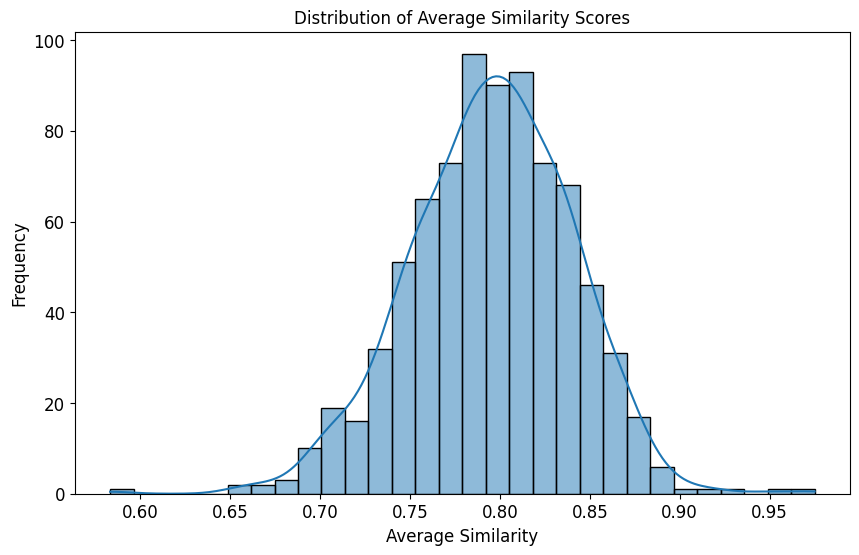

In [ ]:
print(df_cleaned['average_similarity'].describe()) # Output statistical details (like count, mean, standard deviation, minimum and quartile values)
plt.figure(figsize=(10, 6)) # Set up a new figure for plotting with Matplotlib
sns.histplot(df_cleaned['average_similarity'], kde=True, bins=30) # Create a histogram of the average_similarity scores contained within the DataFrame df
plt.title('Distribution of Average Similarity Scores',fontsize=12) # Add a title to the plot
plt.xlabel('Average Similarity',fontsize=12) #Label the x-axis as "Average Similarity" to specify that the histogram bins represent ranges of average similarity scores.
plt.ylabel('Frequency',fontsize=12) #Label the y-axis as "Frequency" to indicate that the height of each histogram bar represents the number of observations
plt.tick_params(axis='x', labelsize='large')  # Increase x-tick label size
plt.tick_params(axis='y', labelsize='large')  # Increase y-tick label size
plt.show() # Display the plot


count    400.000000
mean       0.782810
std        0.043617
min        0.655033
25%        0.754573
50%        0.784332
75%        0.813139
max        0.951277
Name: average_similarity, dtype: float64
count    400.000000
mean       0.807591
std        0.043137
min        0.583334
25%        0.782596
50%        0.808532
75%        0.838050
max        0.975023
Name: average_similarity, dtype: float64


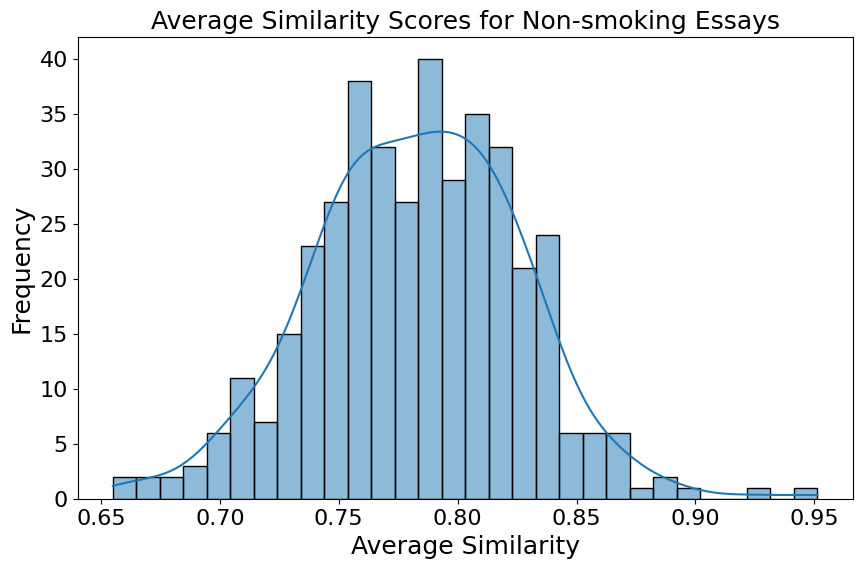

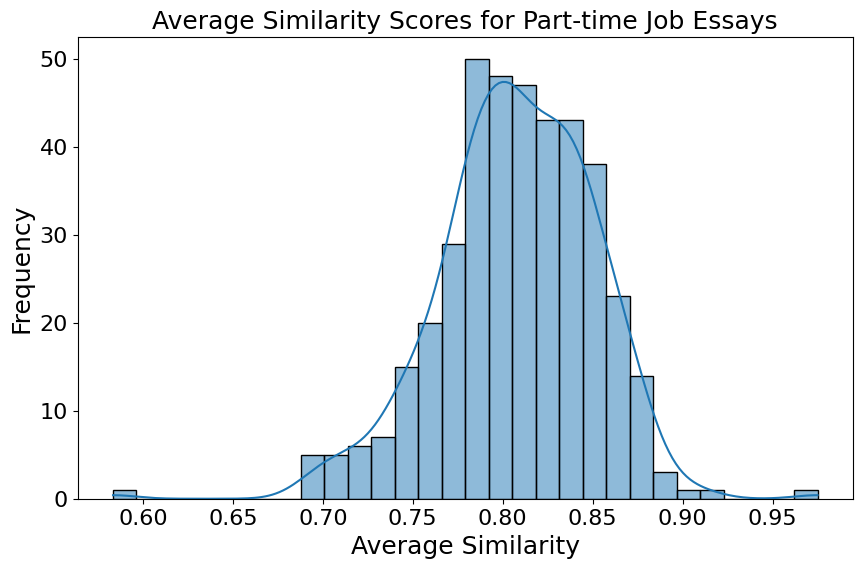

In [ ]:
# Filter the data for each prompt type
df_smk = df_cleaned[df_cleaned['Type'] == 'SMK']
df_ptj = df_cleaned[df_cleaned['Type'] == 'PTJ']

print(df_smk['average_similarity'].describe())
print(df_ptj['average_similarity'].describe())

# Create the figure for 'SML' plot
plt.figure(figsize=(10, 6))
sns.histplot(df_smk['average_similarity'], kde=True, bins=30)
plt.title('Average Similarity Scores for Non-smoking Essays', fontsize=18)
plt.xlabel('Average Similarity', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()  # Display the first plot

# Create the figure for 'PTJ' plot
plt.figure(figsize=(10, 6))
sns.histplot(df_ptj['average_similarity'], kde=True, bins=30)
plt.title('Average Similarity Scores for Part-time Job Essays', fontsize=18)
plt.xlabel('Average Similarity', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()  # Display the second plot


In [ ]:
print(df_cleaned['average_similarity'].describe())
print(df_smk['average_similarity'].describe())
print(df_ptj['average_similarity'].describe())

count    800.000000
mean       0.795201
std        0.045089
min        0.583334
25%        0.766065
50%        0.796340
75%        0.826919
max        0.975023
Name: average_similarity, dtype: float64
count    400.000000
mean       0.782810
std        0.043617
min        0.655033
25%        0.754573
50%        0.784332
75%        0.813139
max        0.951277
Name: average_similarity, dtype: float64
count    400.000000
mean       0.807591
std        0.043137
min        0.583334
25%        0.782596
50%        0.808532
75%        0.838050
max        0.975023
Name: average_similarity, dtype: float64


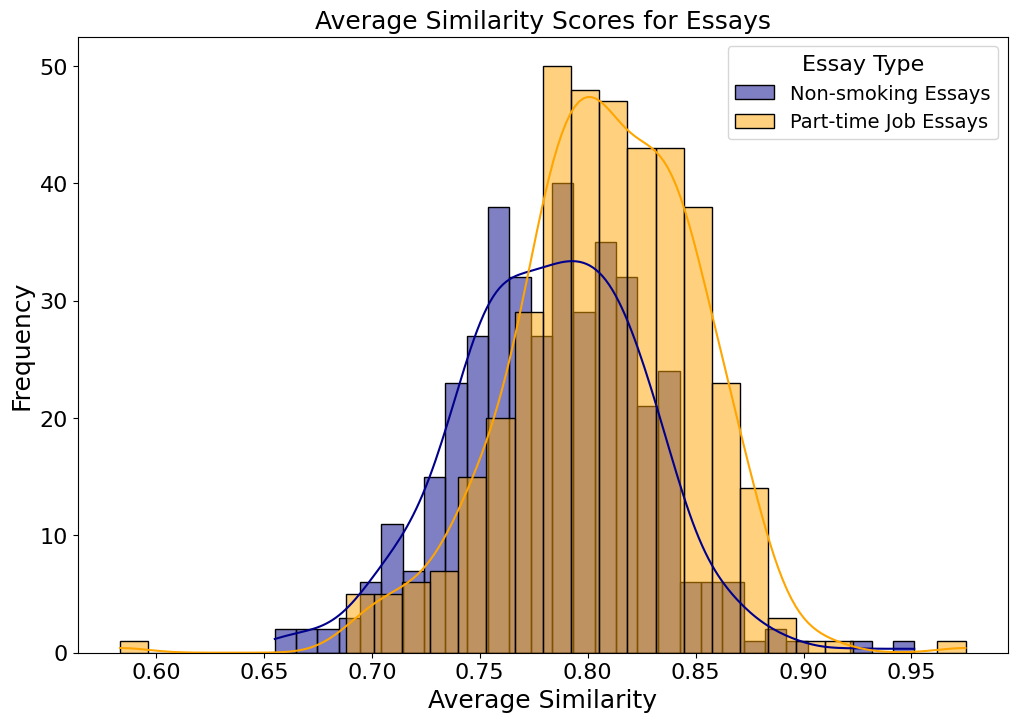

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for each prompt type
df_smk = df_cleaned[df_cleaned['Type'] == 'SMK']
df_ptj = df_cleaned[df_cleaned['Type'] == 'PTJ']

# Create a single figure for both histograms
plt.figure(figsize=(12, 8))

# Plot histogram for 'SMK' with dark blue color
sns.histplot(df_smk['average_similarity'], kde=True, bins=30, color='darkblue', label='Non-smoking Essays')

# Plot histogram for 'PTJ' with bright yellow color
sns.histplot(df_ptj['average_similarity'], kde=True, bins=30, color='orange', label='Part-time Job Essays')

# Adding titles and labels with appropriate font sizes
plt.title('Average Similarity Scores for Essays', fontsize=18)
plt.xlabel('Average Similarity', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

# Adjust tick label sizes
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

# Adding a legend to distinguish between the two histograms
plt.legend(title='Essay Type', title_fontsize='16', fontsize='14')

# Display the combined plot
plt.show()




In [ ]:
proficiency_order = {'A2_0': 1, 'B1_1': 2, 'B1_2': 3, 'B2_0': 4}
df_cleaned['English_proficiency'] = df_cleaned['Proficiency'].map(proficiency_order)
df_cleaned

,Type,Proficiency,Writing_Sample,Background,cleaned_Writing_Sample,average_similarity,English_proficiency
0,SMK,A2_0,﻿Some people hold that smoking should be compl...,CHN,﻿Some people hold smoking completely banned re...,0.764079,1
1,SMK,A2_0,"For many years, smoking is a hot topic for the...",CHN,years smoking hot topic people world . People ...,0.785333,1
2,SMK,A2_0,"Nowadays, it is generally accepted that smokin...",CHN,Nowadays generally accepted smoking problem co...,0.766885,1
3,SMK,A2_0,I disagree the view that smoking should not be...,CHN,disagree view smoking completely banned restau...,0.785222,1
4,SMK,A2_0,"Generally speaking, I don't agree with the ide...",CHN,Generally speaking agree idea topic B smoking ...,0.833217,1
...,...,...,...,...,...,...,...
795,PTJ,B2_0,"Just as an old saying goes, one coin has two s...",CHN,old saying goes coin sides - time job bring co...,0.842651,4
796,PTJ,B2_0,The desire of supporting oneself is luring mor...,CHN,desire supporting oneself luring college stude...,0.841446,4
797,PTJ,B2_0,"Nowadays, more and more college students would...",CHN,Nowadays college students like time jobs major...,0.692455,4
798,PTJ,B2_0,It is my firm belief that it is important and ...,CHN,firm belief important critical university stud...,0.852126,4


In [ ]:
df_smk = df_cleaned[df_cleaned['Type'] == 'SMK']
df_ptj = df_cleaned[df_cleaned['Type'] == 'PTJ']

-0.0026098643071800387 0.9585015835609628
0.022289036989804837 0.6567238583946118


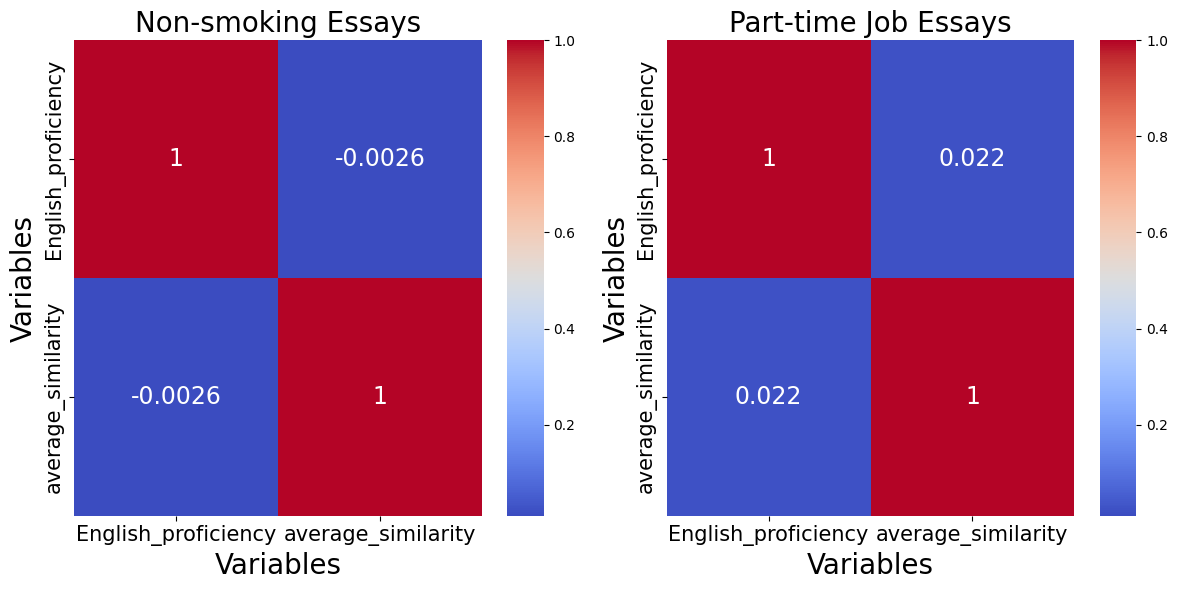

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficients and p-values
spearman_corr_smk, spearman_p_value_smk = spearmanr(df_smk['English_proficiency'], df_smk['average_similarity'])
spearman_corr_ptj, spearman_p_value_ptj = spearmanr(df_ptj['English_proficiency'], df_ptj['average_similarity'])
#spearman_corr_all, spearman_p_value_all = spearmanr(df_cleaned['English_proficiency'], df_cleaned['average_similarity'])

# print out the results
print(spearman_corr_smk, spearman_p_value_smk)
print(spearman_corr_ptj, spearman_p_value_ptj)
#print(spearman_corr_all, spearman_p_value_all)

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define common vmin and vmax based on combined data for consistent color scaling
all_data = pd.concat([df_smk, df_ptj, df_cleaned])
vmin = all_data[['English_proficiency', 'average_similarity']].corr(method='spearman').min().min()
vmax = all_data[['English_proficiency', 'average_similarity']].corr(method='spearman').max().max()

# Heatmap settings with increased annotation size
heatmap_kwargs = {
    'annot': True,
    'cmap': 'coolwarm',
    'cbar': True,
    'annot_kws': {'size': 17},  # Increase annotation text size
    'vmin': vmin,
    'vmax': vmax,
    'cbar_kws': {'shrink': 1, 'aspect': 13}
}

# Plot correlation matrix for SMK essays
sns.heatmap(df_smk[['English_proficiency', 'average_similarity']].corr(method='spearman'), ax=axes[0], **heatmap_kwargs)
axes[0].set_title('Non-smoking Essays',fontsize=20)
axes[0].set_xlabel('Variables', fontsize=20)  # Increase font size for x-axis label
axes[0].set_ylabel('Variables', fontsize=20)  # Increase font size for y-axis label
axes[0].tick_params(axis='both', which='major', labelsize=15)  # Increase tick label size

# Plot correlation matrix for PTJ essays
sns.heatmap(df_ptj[['English_proficiency', 'average_similarity']].corr(method='spearman'), ax=axes[1], **heatmap_kwargs)
axes[1].set_title('Part-time Job Essays', fontsize=20)
axes[1].set_xlabel('Variables', fontsize=20)
axes[1].set_ylabel('Variables', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=15)


# Adjust layout and show the plots
plt.tight_layout()
plt.show()




Non-smoking Essays - Correlation: -0.00, P-value: 0.959
Part-time Job Essays - Correlation: 0.02, P-value: 0.657


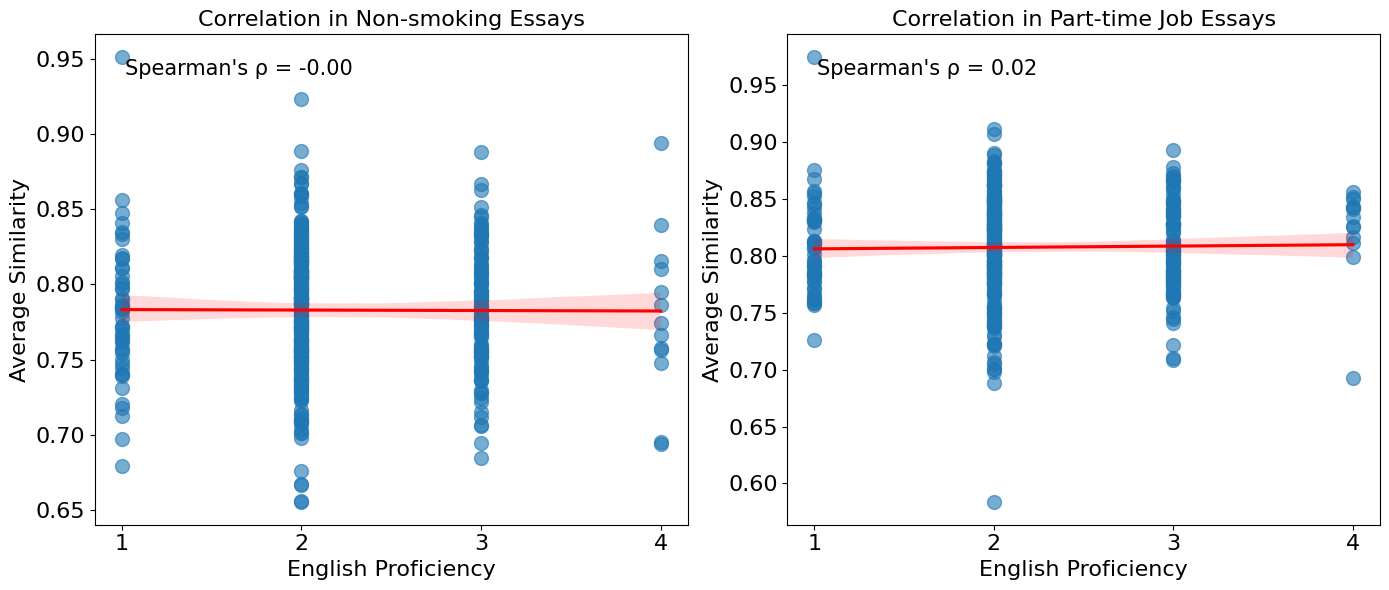

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficients and p-values
spearman_corr_smk, spearman_p_value_smk = spearmanr(df_smk['English_proficiency'], df_smk['average_similarity'])
spearman_corr_ptj, spearman_p_value_ptj = spearmanr(df_ptj['English_proficiency'], df_ptj['average_similarity'])

# Print out the results
print("Non-smoking Essays - Correlation: {:.2f}, P-value: {:.3f}".format(spearman_corr_smk, spearman_p_value_smk))
print("Part-time Job Essays - Correlation: {:.2f}, P-value: {:.3f}".format(spearman_corr_ptj, spearman_p_value_ptj))

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for SMK essays
sns.regplot(x='English_proficiency', y='average_similarity', data=df_smk, ax=axes[0], scatter_kws={'s': 100, 'alpha': 0.6}, line_kws={'color': 'red'})
axes[0].set_title('Correlation in Non-smoking Essays', fontsize=16)
axes[0].set_xlabel('English Proficiency', fontsize=16)
axes[0].set_ylabel('Average Similarity', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=16)

# Annotating the correlation coefficient
axes[0].text(0.05, 0.95, 'Spearman\'s ρ = {:.2f}'.format(spearman_corr_smk), transform=axes[0].transAxes, fontsize=15, verticalalignment='top')
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure x-axis has only integer labels
axes[1].tick_params(axis='both', which='major', labelsize=14)
# Scatter plot for PTJ essays
sns.regplot(x='English_proficiency', y='average_similarity', data=df_ptj, ax=axes[1], scatter_kws={'s': 100, 'alpha': 0.6}, line_kws={'color': 'red'})
axes[1].set_title('Correlation in Part-time Job Essays', fontsize=16)
axes[1].set_xlabel('English Proficiency', fontsize=16)
axes[1].set_ylabel('Average Similarity', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)

# Annotating the correlation coefficient
axes[1].text(0.05, 0.95, 'Spearman\'s ρ = {:.2f}'.format(spearman_corr_ptj), transform=axes[1].transAxes, fontsize=15, verticalalignment='top')
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure x-axis has only integer labels

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



# RQ2: conjunctions

In [ ]:
# lowercase
df_cleaned['lowercase_Writing_Sample']=df_cleaned['Writing_Sample'].str.lower()
df_cleaned

,Type,Proficiency,Writing_Sample,Background,cleaned_Writing_Sample,average_similarity,English_proficiency,lowercase_Writing_Sample
0,SMK,A2_0,﻿Some people hold that smoking should be compl...,CHN,﻿Some people hold smoking completely banned re...,0.764079,1,﻿some people hold that smoking should be compl...
1,SMK,A2_0,"For many years, smoking is a hot topic for the...",CHN,years smoking hot topic people world . People ...,0.785333,1,"for many years, smoking is a hot topic for the..."
2,SMK,A2_0,"Nowadays, it is generally accepted that smokin...",CHN,Nowadays generally accepted smoking problem co...,0.766885,1,"nowadays, it is generally accepted that smokin..."
3,SMK,A2_0,I disagree the view that smoking should not be...,CHN,disagree view smoking completely banned restau...,0.785222,1,i disagree the view that smoking should not be...
4,SMK,A2_0,"Generally speaking, I don't agree with the ide...",CHN,Generally speaking agree idea topic B smoking ...,0.833217,1,"generally speaking, i don't agree with the ide..."
...,...,...,...,...,...,...,...,...
795,PTJ,B2_0,"Just as an old saying goes, one coin has two s...",CHN,old saying goes coin sides - time job bring co...,0.842651,4,"just as an old saying goes, one coin has two s..."
796,PTJ,B2_0,The desire of supporting oneself is luring mor...,CHN,desire supporting oneself luring college stude...,0.841446,4,the desire of supporting oneself is luring mor...
797,PTJ,B2_0,"Nowadays, more and more college students would...",CHN,Nowadays college students like time jobs major...,0.692455,4,"nowadays, more and more college students would..."
798,PTJ,B2_0,It is my firm belief that it is important and ...,CHN,firm belief important critical university stud...,0.852126,4,it is my firm belief that it is important and ...


In [ ]:
# spacy the texts
reading_data_docs = list(nlp.pipe(df_cleaned['lowercase_Writing_Sample']))

# Initialize lists to store results
conj_counts = []
conj_percentages = []

for doc in reading_data_docs:
    total_words = 0  # Count for total number of words
    conj_count = 0  # Count for conjunctions

    for token in doc:
        if not token.is_punct and not token.pos_ == "SPACE":  # Count meaningful word-like tokens
            total_words += 1
            if token.pos_ == "CCONJ":
                conj_count += 1

    conj_counts.append(conj_count)
    conj_percentages.append((conj_count / total_words) if total_words > 0 else 0)  # Calculate percentage

# Add counts and percentages to the DataFrame
df_cleaned['Conjunction_Count'] = conj_counts
df_cleaned['Conjunction_Percentage'] = conj_percentages

# Print out
df_cleaned

,Type,Proficiency,Writing_Sample,Background,cleaned_Writing_Sample,average_similarity,English_proficiency,lowercase_Writing_Sample,Conjunction_Count,Conjunction_Percentage
0,SMK,A2_0,﻿Some people hold that smoking should be compl...,CHN,﻿Some people hold smoking completely banned re...,0.764079,1,﻿some people hold that smoking should be compl...,7,0.033816
1,SMK,A2_0,"For many years, smoking is a hot topic for the...",CHN,years smoking hot topic people world . People ...,0.785333,1,"for many years, smoking is a hot topic for the...",5,0.023585
2,SMK,A2_0,"Nowadays, it is generally accepted that smokin...",CHN,Nowadays generally accepted smoking problem co...,0.766885,1,"nowadays, it is generally accepted that smokin...",6,0.029557
3,SMK,A2_0,I disagree the view that smoking should not be...,CHN,disagree view smoking completely banned restau...,0.785222,1,i disagree the view that smoking should not be...,3,0.013216
4,SMK,A2_0,"Generally speaking, I don't agree with the ide...",CHN,Generally speaking agree idea topic B smoking ...,0.833217,1,"generally speaking, i don't agree with the ide...",4,0.018692
...,...,...,...,...,...,...,...,...,...,...
795,PTJ,B2_0,"Just as an old saying goes, one coin has two s...",CHN,old saying goes coin sides - time job bring co...,0.842651,4,"just as an old saying goes, one coin has two s...",13,0.041534
796,PTJ,B2_0,The desire of supporting oneself is luring mor...,CHN,desire supporting oneself luring college stude...,0.841446,4,the desire of supporting oneself is luring mor...,15,0.044643
797,PTJ,B2_0,"Nowadays, more and more college students would...",CHN,Nowadays college students like time jobs major...,0.692455,4,"nowadays, more and more college students would...",5,0.024155
798,PTJ,B2_0,It is my firm belief that it is important and ...,CHN,firm belief important critical university stud...,0.852126,4,it is my firm belief that it is important and ...,9,0.027778


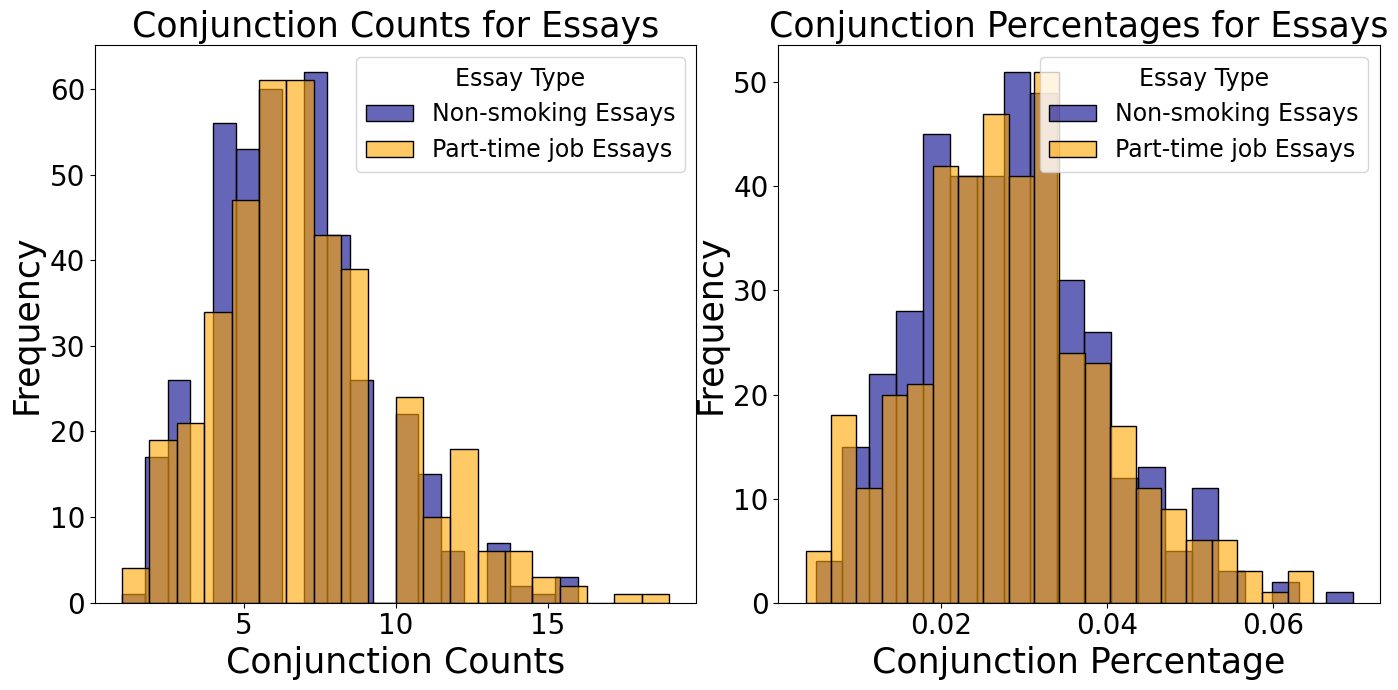

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for 'SMK' and 'PTJ'
df_smk = df_cleaned[df_cleaned['Type'] == 'SMK']
df_ptj = df_cleaned[df_cleaned['Type'] == 'PTJ']


plt.figure(figsize=(14, 7))

# Histogram for Conjunction Counts
plt.subplot(1, 2, 1)
sns.histplot(df_smk['Conjunction_Count'], color='darkblue', label='Non-smoking Essays', bins=20, kde=False, alpha=0.6)
sns.histplot(df_ptj['Conjunction_Count'], color='orange', label='Part-time job Essays', bins=20, kde=False, alpha=0.6)
plt.title('Conjunction Counts for Essays',fontsize=25)
plt.xlabel('Conjunction Counts',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.legend(title='Essay Type', title_fontsize='17', fontsize='17')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Histogram for Conjunction Percentages
plt.subplot(1, 2, 2)
sns.histplot(df_smk['Conjunction_Percentage'], color='darkblue', label='Non-smoking Essays', bins=20, kde=False, alpha=0.6)
sns.histplot(df_ptj['Conjunction_Percentage'], color='orange', label='Part-time job Essays', bins=20, kde=False, alpha=0.6)
plt.title('Conjunction Percentages for Essays',fontsize=25)
plt.xlabel('Conjunction Percentage',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.legend(title='Essay Type', title_fontsize='17', fontsize='17')
plt.tight_layout()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()


In [ ]:
# descriptive stats
print("For SMK...")
print(df_smk['Conjunction_Count'].describe())
print(df_smk['Conjunction_Percentage'].describe())

print("For ptj...")
print(df_ptj['Conjunction_Count'].describe())
print(df_ptj['Conjunction_Percentage'].describe())

For SMK...
count    400.000000
mean       6.532500
std        2.722586
min        1.000000
25%        4.750000
50%        6.000000
75%        8.000000
max       16.000000
Name: Conjunction_Count, dtype: float64
count    400.000000
mean       0.028096
std        0.010893
min        0.004926
25%        0.019704
50%        0.027907
75%        0.034196
max        0.069565
Name: Conjunction_Percentage, dtype: float64
For ptj...
count    400.000000
mean       7.015000
std        3.030302
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       19.000000
Name: Conjunction_Count, dtype: float64
count    400.000000
mean       0.028389
std        0.011338
min        0.003745
25%        0.021086
50%        0.027842
75%        0.034671
max        0.064815
Name: Conjunction_Percentage, dtype: float64


In [ ]:
df_cleaned

,Type,Proficiency,Writing_Sample,Background,cleaned_Writing_Sample,average_similarity,English_proficiency,lowercase_Writing_Sample,Conjunction_Count,Conjunction_Percentage
0,SMK,A2_0,﻿Some people hold that smoking should be compl...,CHN,﻿Some people hold smoking completely banned re...,0.764079,1,﻿some people hold that smoking should be compl...,7,0.033816
1,SMK,A2_0,"For many years, smoking is a hot topic for the...",CHN,years smoking hot topic people world . People ...,0.785333,1,"for many years, smoking is a hot topic for the...",5,0.023585
2,SMK,A2_0,"Nowadays, it is generally accepted that smokin...",CHN,Nowadays generally accepted smoking problem co...,0.766885,1,"nowadays, it is generally accepted that smokin...",6,0.029557
3,SMK,A2_0,I disagree the view that smoking should not be...,CHN,disagree view smoking completely banned restau...,0.785222,1,i disagree the view that smoking should not be...,3,0.013216
4,SMK,A2_0,"Generally speaking, I don't agree with the ide...",CHN,Generally speaking agree idea topic B smoking ...,0.833217,1,"generally speaking, i don't agree with the ide...",4,0.018692
...,...,...,...,...,...,...,...,...,...,...
795,PTJ,B2_0,"Just as an old saying goes, one coin has two s...",CHN,old saying goes coin sides - time job bring co...,0.842651,4,"just as an old saying goes, one coin has two s...",13,0.041534
796,PTJ,B2_0,The desire of supporting oneself is luring mor...,CHN,desire supporting oneself luring college stude...,0.841446,4,the desire of supporting oneself is luring mor...,15,0.044643
797,PTJ,B2_0,"Nowadays, more and more college students would...",CHN,Nowadays college students like time jobs major...,0.692455,4,"nowadays, more and more college students would...",5,0.024155
798,PTJ,B2_0,It is my firm belief that it is important and ...,CHN,firm belief important critical university stud...,0.852126,4,it is my firm belief that it is important and ...,9,0.027778


In [ ]:
pip install statsmodels


In [ ]:
from scipy.stats import shapiro

In [ ]:
# check normality..
df_smk = df_cleaned[df_cleaned['Type'] == 'SMK']
df_ptj = df_cleaned[df_cleaned['Type'] == 'PTJ']
# Testing normality for SMK essays
stat_smk, p_smk = shapiro(df_smk['Conjunction_Percentage'])
print(f'SMK Essays - Statistics={stat_smk:.3f}, p-value={p_smk:.3f}')

# Testing normality for PTJ essays
stat_ptj, p_ptj = shapiro(df_ptj['Conjunction_Percentage'])
print(f'PTJ Essays - Statistics={stat_ptj:.3f}, p-value={p_ptj:.3f}')

# Interpreting the results
if p_smk < 0.05:
    print("SMK Essays: Data does not appear to be normally distributed (reject H0)")
else:
    print("SMK Essays: Data appears to be normally distributed (fail to reject H0)")

if p_ptj < 0.05:
    print("PTJ Essays: Data does not appear to be normally distributed (reject H0)")
else:
    print("PTJ Essays: Data appears to be normally distributed (fail to reject H0)")

SMK Essays - Statistics=0.983, p-value=0.000
PTJ Essays - Statistics=0.986, p-value=0.001
SMK Essays: Data does not appear to be normally distributed (reject H0)
PTJ Essays: Data does not appear to be normally distributed (reject H0)


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_conjunction_usage(df_smk, df_ptj):
    results = []

    # Function to perform ANOVA and calculate Eta Squared
    def perform_anova(df, essay_type):
        model = ols('Conjunction_Percentage ~ C(English_proficiency)', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        eta_squared = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0] + anova_table['sum_sq'][1])
        p_value = anova_table['PR(>F)'][0]
        results.append([essay_type, p_value, eta_squared])

    # Perform ANOVA for SMK essays
    perform_anova(df_smk, 'SMK')

    # Perform ANOVA for PTJ essays
    perform_anova(df_ptj, 'PTJ')

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results, columns=['Essay Type', 'P-Value', 'Effect Size'])

    return results_df

# Assuming df_smk and df_ptj are already defined and loaded with appropriate data
# Example usage:
anova_results_df = anova_conjunction_usage(df_smk, df_ptj)
print(anova_results_df)



  Essay Type   P-Value  Effect Size
0        SMK  0.567408     0.005092
1        PTJ  0.270705     0.009827
